<a href="https://colab.research.google.com/github/nasirch66/KAGGLE-25924/blob/main/M_Nasir2924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise an awareness about mental health issues around the world and mobilise efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide.

You are a Machine Learning engineer in a company. You are given a task to understand and observe the mental health of all the employees in your company. Therefore, you are required to predict the burn out rate of employees based on the provided features thus helping the company to take appropriate measures for their employees.

Sources:

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://stackoverflow.com/

https://chat.openai.com/

https://www.freecodecamp.org/news/exploratory-data-analysis-with-numpy-pandas-matplotlib-seaborn/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pandas: A library for data manipulation and analysis, providing powerful data structures and functions.
numpy: A fundamental library for scientific computing with support for large, multi-dimensional arrays and mathematical functions.
seaborn: A statistical data visualization library that simplifies creating informative and visually appealing plots.
matplotlib.pyplot: A plotting library for creating static and interactive visualizations in Python, with functionality similar to MATLAB.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


train.info() provides a concise summary of the DataFrame train, including column data types and non-null value counts.

In [5]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


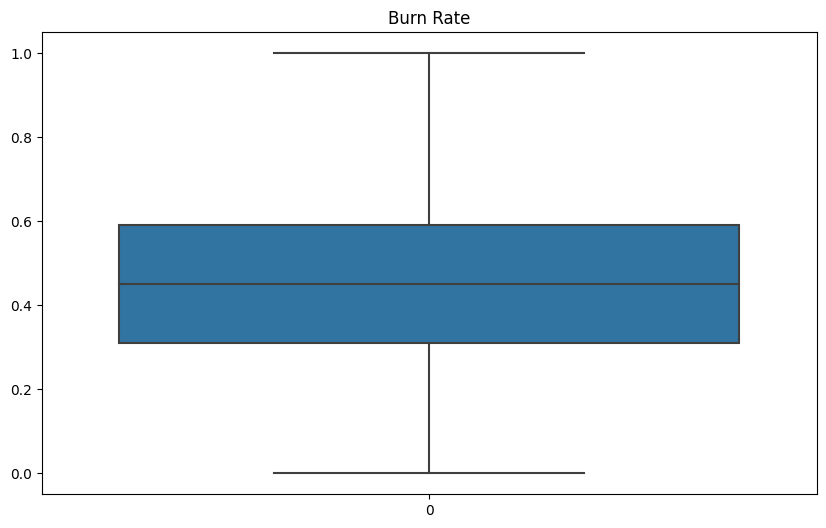

In [6]:
plt.figure(figsize = (10,6))
sns.boxplot(train['Burn Rate'])
plt.title('Burn Rate')
plt.show()

This code creates a figure with a size of 10x6 inches, then plots a box plot using Seaborn (sns) to visualize the distribution of the 'Burn Rate' column in the DataFrame train.

In [7]:
import datetime as dt

The line import datetime as dt imports the datetime module from the Python standard library and assigns it the alias dt. This allows you to use the classes and functions provided by the datetime module to work with dates, times, and time intervals in your code.

In [8]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])

In [9]:
train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [10]:
def get_y_m_d(train):
    train['Years'] = train['Date of Joining'].dt.year
    train['Months'] = train['Date of Joining'].dt.month
    train['Date'] = train['Date of Joining'].dt.day
    return train

The function get_y_m_d(train) takes a DataFrame train as input and performs the following operations:

It creates a new column 'Years' in the train DataFrame, which contains the year component extracted from the 'Date of Joining' column using the dt.year attribute.
It creates a new column 'Months' in the train DataFrame, which contains the month component extracted from the 'Date of Joining' column using the dt.month attribute.
It creates a new column 'Date' in the train DataFrame, which contains the day component extracted from the 'Date of Joining' column using the dt.day attribute.
Finally, it returns the modified train DataFrame with the additional columns.

In [11]:
train = get_y_m_d(train)

In [12]:
train.drop(columns =['Date of Joining'],inplace = True)

In [13]:
train

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years,Months,Date
0,fffe32003000360033003200,Female,Service,No,2.0,3.0,3.8,0.16,2008,9,30
1,fffe3700360033003500,Male,Service,Yes,1.0,2.0,5.0,0.36,2008,11,30
2,fffe31003300320037003900,Female,Product,Yes,2.0,NaN,5.8,0.49,2008,3,10
3,fffe32003400380032003900,Male,Service,Yes,1.0,1.0,2.6,0.20,2008,11,3
4,fffe31003900340031003600,Female,Service,No,3.0,7.0,6.9,0.52,2008,7,24
...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,Female,Service,No,1.0,3.0,NaN,0.41,2008,12,30
22746,fffe33003000350031003800,Female,Product,Yes,3.0,6.0,6.7,0.59,2008,1,19
22747,fffe390032003000,Male,Service,Yes,3.0,7.0,NaN,0.72,2008,11,5
22748,fffe33003300320036003900,Female,Service,No,2.0,5.0,5.9,0.52,2008,1,10


In [14]:
train['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()


The code imports the LabelEncoder class from scikit-learn for label encoding categorical variables. An instance of LabelEncoder is created and assigned to the variable lab_enc, which can be used to encode labels and convert them into numerical representations.

In [16]:
train['Gender']=lab_enc.fit_transform(train['Gender'])

In [17]:
train['Company Type']=lab_enc.fit_transform(train['Company Type'])
train['WFH Setup Available']=lab_enc.fit_transform(train['WFH Setup Available'])

The given code applies the fit_transform() method of the LabelEncoder object (lab_enc) to encode the 'Company Type' and 'WFH Setup Available' columns in the DataFrame train. It transforms the categorical values in these columns into corresponding numeric representations.

In [18]:
train

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years,Months,Date
0,fffe32003000360033003200,0,1,0,2.0,3.0,3.8,0.16,2008,9,30
1,fffe3700360033003500,1,1,1,1.0,2.0,5.0,0.36,2008,11,30
2,fffe31003300320037003900,0,0,1,2.0,NaN,5.8,0.49,2008,3,10
3,fffe32003400380032003900,1,1,1,1.0,1.0,2.6,0.20,2008,11,3
4,fffe31003900340031003600,0,1,0,3.0,7.0,6.9,0.52,2008,7,24
...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,0,1,0,1.0,3.0,NaN,0.41,2008,12,30
22746,fffe33003000350031003800,0,0,1,3.0,6.0,6.7,0.59,2008,1,19
22747,fffe390032003000,1,1,1,3.0,7.0,NaN,0.72,2008,11,5
22748,fffe33003300320036003900,0,1,0,2.0,5.0,5.9,0.52,2008,1,10


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Gender                22750 non-null  int64  
 2   Company Type          22750 non-null  int64  
 3   WFH Setup Available   22750 non-null  int64  
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
 8   Years                 22750 non-null  int64  
 9   Months                22750 non-null  int64  
 10  Date                  22750 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.9+ MB


In [20]:
train.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years,Months,Date
count,22750.000000,22750.000000,22750.000000,22750.000000,21369.000000,20633.000000,21626.000000,22750.0,22750.000000,22750.000000
mean,0.476571,0.652000,0.540220,2.178725,4.481398,5.728188,0.452005,2008.0,6.509978,15.760659
std,0.499462,0.476346,0.498391,1.135145,2.047211,1.920839,0.198226,0.0,3.440477,8.769239
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2008.0,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000,2008.0,4.000000,8.000000
50%,0.000000,1.000000,1.000000,2.000000,4.000000,5.900000,0.450000,2008.0,7.000000,16.000000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000,2008.0,9.000000,23.000000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000,2008.0,12.000000,31.000000


In [21]:
mean1 = train.groupby('Company Type').mean()['Resource Allocation'].round().loc[0]
mean2 = train.groupby('Company Type').mean()['Resource Allocation'].round().loc[1]
train.loc[train['Company Type']==0,'Resource Allocation'] = train.loc[train['Company Type']==0,'Resource Allocation'].fillna(value=mean1)
train.loc[train['Company Type']==1,'Resource Allocation'] = train.loc[train['Company Type']==1,'Resource Allocation'].fillna(value=mean1)

<ipython-input-21-1af391fa3cec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1 = train.groupby('Company Type').mean()['Resource Allocation'].round().loc[0]
<ipython-input-21-1af391fa3cec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean2 = train.groupby('Company Type').mean()['Resource Allocation'].round().loc[1]


This code ensures that missing values in the 'Resource Allocation' column are replaced with the mean value specific to the corresponding 'Company Type'.

In [22]:
mean1 = round((train.groupby('Company Type').mean()['Mental Fatigue Score'].loc[0]),1)
mean2 = round((train.groupby('Company Type').mean()['Mental Fatigue Score'].loc[1]),1)
train.loc[train['Company Type']==0,'Mental Fatigue Score'] = train.loc[train['Company Type']==0,'Mental Fatigue Score'].fillna(value=mean1)
train.loc[train['Company Type']==1,'Mental Fatigue Score'] = train.loc[train['Company Type']==1,'Mental Fatigue Score'].fillna(value=mean1)


<ipython-input-22-fe59b4cae3a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1 = round((train.groupby('Company Type').mean()['Mental Fatigue Score'].loc[0]),1)
<ipython-input-22-fe59b4cae3a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean2 = round((train.groupby('Company Type').mean()['Mental Fatigue Score'].loc[1]),1)


This code ensures that missing values in the 'Mental Fatigue Score' column are replaced with the mean value specific to the corresponding 'Company Type', rounded to one decimal place.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Gender                22750 non-null  int64  
 2   Company Type          22750 non-null  int64  
 3   WFH Setup Available   22750 non-null  int64  
 4   Designation           22750 non-null  float64
 5   Resource Allocation   22750 non-null  float64
 6   Mental Fatigue Score  22750 non-null  float64
 7   Burn Rate             21626 non-null  float64
 8   Years                 22750 non-null  int64  
 9   Months                22750 non-null  int64  
 10  Date                  22750 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.9+ MB


In [24]:
s=0
for i in range(len(train['Burn Rate'])):
    if train['Burn Rate'][i]<0:
        print(train['Burn Rate'][i])
        s+=1
print(s)

0


If the condition is true, it prints the value using print(train['Burn Rate'][i]) and increments s by 1 using the += operator.
Finally, it prints the value of s, which represents the count of 'Burn Rate' values that are less than 0.
Essentially, the code is identifying and printing any 'Burn Rate' values that are less than 0 and counting the total number of such values.

In [25]:
train = train[train['Burn Rate']>=0]

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Gender                21626 non-null  int64  
 2   Company Type          21626 non-null  int64  
 3   WFH Setup Available   21626 non-null  int64  
 4   Designation           21626 non-null  float64
 5   Resource Allocation   21626 non-null  float64
 6   Mental Fatigue Score  21626 non-null  float64
 7   Burn Rate             21626 non-null  float64
 8   Years                 21626 non-null  int64  
 9   Months                21626 non-null  int64  
 10  Date                  21626 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 2.0+ MB


In [27]:
tarin = train.drop(columns = 'Employee ID',inplace =True)

<ipython-input-27-8b9d0055b638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tarin = train.drop(columns = 'Employee ID',inplace =True)


The given code drops the column 'Employee ID' from the DataFrame train using the drop() function with the columns parameter set to 'Employee ID'. The inplace=True argument specifies that the modification should be made directly on the train DataFrame itself, without creating a new DataFrame. 

In [28]:
train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years,Months,Date
0,0,1,0,2.0,3.0,3.8,0.16,2008,9,30
1,1,1,1,1.0,2.0,5.0,0.36,2008,11,30
2,0,0,1,2.0,4.0,5.8,0.49,2008,3,10
3,1,1,1,1.0,1.0,2.6,0.20,2008,11,3
4,0,1,0,3.0,7.0,6.9,0.52,2008,7,24
...,...,...,...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.0,5.7,0.41,2008,12,30
22746,0,0,1,3.0,6.0,6.7,0.59,2008,1,19
22747,1,1,1,3.0,7.0,5.7,0.72,2008,11,5
22748,0,1,0,2.0,5.0,5.9,0.52,2008,1,10


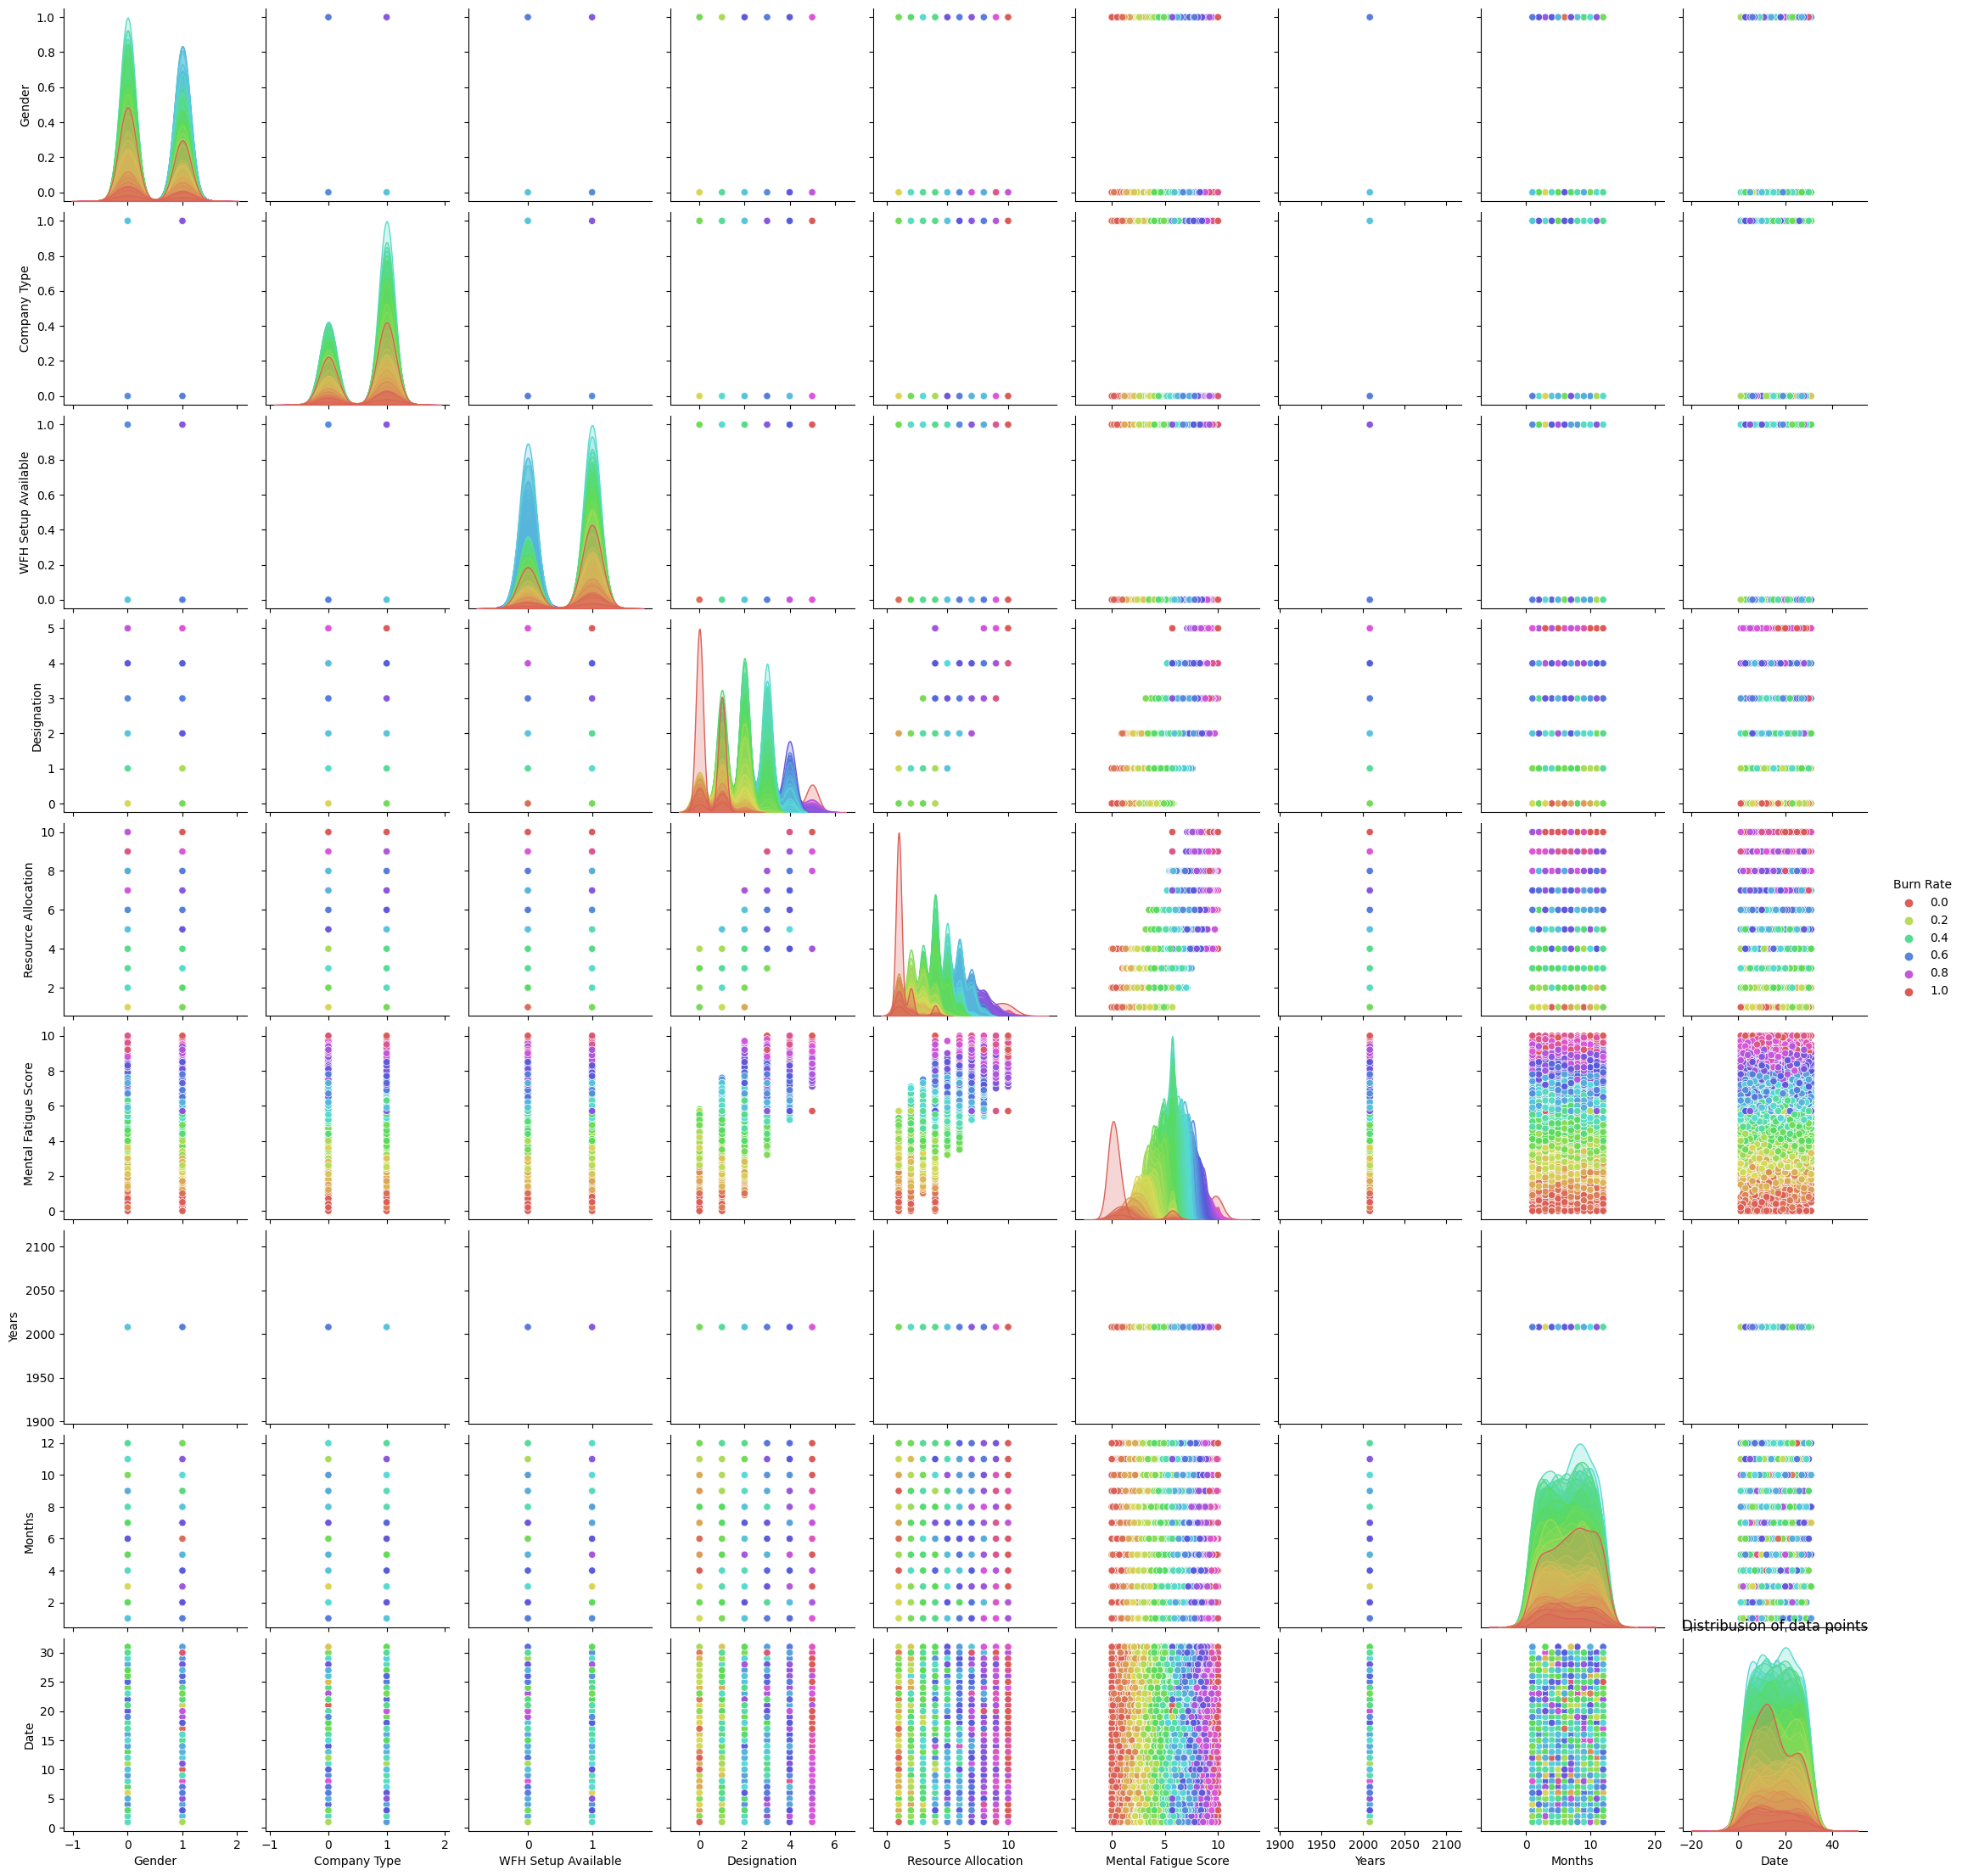

In [29]:
sns.pairplot(train,hue = 'Burn Rate',palette='hls')
plt.title('Distribusion of data points')
plt.show()


https://seaborn.pydata.org/generated/seaborn.pairplot.html

The plot is then displayed with the title 'Distribution of data points' using plt.title(), and plt.show() is used to show the plot. 

In [30]:
y = train.iloc[:,6].values
x = train.drop(['Burn Rate'],axis = 1).values

In [31]:
print(x.shape)
print(y.shape)


(21626, 9)
(21626,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
sc.fit_transform(x)

array([[-0.95159988,  0.7288022 , -1.08417483, ...,  0.        ,
         0.7238327 ,  1.62233089],
       [ 1.05086184,  0.7288022 ,  0.92236046, ...,  0.        ,
         1.30499497,  1.62233089],
       [-0.95159988, -1.37211441,  0.92236046, ...,  0.        ,
        -1.01965413, -0.65572248],
       ...,
       [ 1.05086184,  0.7288022 ,  0.92236046, ...,  0.        ,
         1.30499497, -1.22523582],
       [-0.95159988,  0.7288022 , -1.08417483, ...,  0.        ,
        -1.6008164 , -0.65572248],
       [ 1.05086184, -1.37211441, -1.08417483, ...,  0.        ,
        -1.6008164 , -1.11133316]])

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(x,y)

LinearRegression()

In [36]:
lr_score = lr.score(x,y)

In [37]:
test['Date of Joining'] = pd.to_datetime(test['Date of Joining'])

The pd.to_datetime() function is used to convert a column or a series of values to a datetime format. In this case, it is applied to the 'Date of Joining' column in the DataFrame test

In [38]:
def get_y_m_d(test):
    test['Year'] = test['Date of Joining'].dt.year
    test['Month'] = test['Date of Joining'].dt.month
    test['Date'] = test['Date of Joining'].dt.day
    test.drop(columns = ['Date of Joining'],inplace =True)
    return test


The inplace=True parameter in the drop() function modifies the test DataFrame directly without creating a new DataFrame, and the original 'Date of Joining' column is dropped.

In [39]:
test = get_y_m_d(test)

In [40]:
test

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Year,Month,Date
0,fffe31003300390039003000,Female,Service,No,2.0,5.0,7.7,2008,12,10
1,fffe31003300310037003800,Female,Product,Yes,1.0,2.0,5.2,2008,8,14
2,fffe33003400380035003900,Male,Product,Yes,1.0,3.0,5.9,2008,11,13
3,fffe3100370039003200,Female,Service,No,3.0,6.0,4.6,2008,2,7
4,fffe32003600390036003700,Female,Product,No,2.0,5.0,6.4,2008,7,17
...,...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,Female,Service,Yes,1.0,2.0,6.1,2008,10,2
12246,fffe32003600330034003000,Female,Product,Yes,2.0,4.0,5.9,2008,3,31
12247,fffe31003800340039003000,Male,Service,No,4.0,7.0,9.6,2008,2,12
12248,fffe32003600380031003800,Male,Service,No,3.0,6.0,6.7,2008,2,6


In [41]:
test['Gender']=lab_enc.fit_transform(test['Gender'])
test['Company Type']=lab_enc.fit_transform(test['Company Type'])
test['WFH Setup Available']=lab_enc.fit_transform(test['WFH Setup Available'])

applies label encoding to the 'Gender', 'Company Type', and 'WFH Setup Available' columns in the DataFrame test using the fit_transform() method of the lab_enc LabelEncoder object.

In [42]:
test

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Year,Month,Date
0,fffe31003300390039003000,0,1,0,2.0,5.0,7.7,2008,12,10
1,fffe31003300310037003800,0,0,1,1.0,2.0,5.2,2008,8,14
2,fffe33003400380035003900,1,0,1,1.0,3.0,5.9,2008,11,13
3,fffe3100370039003200,0,1,0,3.0,6.0,4.6,2008,2,7
4,fffe32003600390036003700,0,0,0,2.0,5.0,6.4,2008,7,17
...,...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,0,1,1,1.0,2.0,6.1,2008,10,2
12246,fffe32003600330034003000,0,0,1,2.0,4.0,5.9,2008,3,31
12247,fffe31003800340039003000,1,1,0,4.0,7.0,9.6,2008,2,12
12248,fffe32003600380031003800,1,1,0,3.0,6.0,6.7,2008,2,6


In [43]:
x_test = test.drop(columns = ['Employee ID'],axis=1).values

creates a NumPy array x_test by dropping the 'Employee ID' column from the DataFrame test.

In [44]:
sc.fit_transform(x_test)

array([[-0.94905122,  0.72834385, -1.08757644, ...,  0.        ,
         1.58312674, -0.64685327],
       [-0.94905122, -1.37297789,  0.9194756 , ...,  0.        ,
         0.43001613, -0.19361569],
       [ 1.05368391, -1.37297789,  0.9194756 , ...,  0.        ,
         1.29484909, -0.30692509],
       ...,
       [ 1.05368391,  0.72834385, -1.08757644, ...,  0.        ,
        -1.29964979, -0.42023448],
       [ 1.05368391,  0.72834385, -1.08757644, ...,  0.        ,
        -1.29964979, -1.10009084],
       [-0.94905122, -1.37297789, -1.08757644, ...,  0.        ,
         0.43001613, -1.21340023]])

standardizes or normalizes the values in the x_test NumPy array using the fit_transform() method of the sc StandardScaler object.

In [45]:
from sklearn.tree import DecisionTreeRegressor
ds = DecisionTreeRegressor()

imports the DecisionTreeRegressor class from the sklearn.tree module and creates an instance of the decision tree regressor model named ds.

In [46]:
ds.fit(x,y)

DecisionTreeRegressor()

In [47]:
ds_score =ds.score(x,y)

In [48]:
from sklearn.ensemble import RandomForestRegressor
lf=RandomForestRegressor(max_depth=19)

imports the RandomForestRegressor class from sklearn.ensemble and creates an instance of the random forest regressor model named lf. The max_depth=19 parameter sets the maximum depth of each tree in the random forest. The random forest regressor combines multiple decision trees to make predictions and is commonly used for regression tasks.

In [49]:
lf.fit(x,y)

RandomForestRegressor(max_depth=19)

In [50]:
lf_score = lf.score(x,y)

computes the R-squared score of the random forest regressor model lf on the input features x and the target variable y using the score() method, and assigns the result to the variable lf_score. The R-squared score is a measure of how well the model fits the data, with higher values indicating a better fit.

In [51]:
from tabulate import tabulate

The tabulate module is imported from the tabulate library, which is used for formatting and displaying tabular data in Python.

In [52]:
table = []
table.append(['Sr.No.', 'Regression Model', 'Score'])
table.append(['1','Linear Regression',lr_score])
table.append(['2','Random Forest Regressor',ds_score])
table.append(['3','Decision Tree Regressor',lf_score])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤═════════════════════════╤══════════╕
│   Sr.No. │ Regression Model        │    Score │
╞══════════╪═════════════════════════╪══════════╡
│        1 │ Linear Regression       │ 0.870693 │
├──────────┼─────────────────────────┼──────────┤
│        2 │ Random Forest Regressor │ 0.998862 │
├──────────┼─────────────────────────┼──────────┤
│        3 │ Decision Tree Regressor │ 0.980091 │
╘══════════╧═════════════════════════╧══════════╛


creates a table as a list of lists named table. It appends rows representing different regression models, including their serial number, name, and corresponding score, to the table list. Finally, the tabulate function is used to format and print the table with headers and a fancy grid format.

In [53]:
y_pred = lf.predict(x_test)
y_pred1 = np.around(y_pred,2)
y_pred1

array([0.63, 0.36, 0.44, ..., 0.84, 0.6 , 0.14])

predicts the target variable y for the test set x_test using the random forest regressor model lf and assigns the predictions to y_pred. Then, it rounds the predicted values to two decimal places using np.around() function and assigns the rounded values to y_pred1.

In [54]:
s = 0
for i in range(len(y_pred1)):
    if y_pred1[i]<0:
        print(y_pred1[i]<0)
        s +=1
print(s)

0


iterates over the predicted values y_pred1 and checks if each value is less than zero. If a value is less than zero, it prints True indicating that the condition is satisfied. It also increments the variable s by 1 for each negative predicted value. Finally, it prints the value of s, which represents the count of negative predicted values in y_pred1.

In [55]:
test

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Year,Month,Date
0,fffe31003300390039003000,0,1,0,2.0,5.0,7.7,2008,12,10
1,fffe31003300310037003800,0,0,1,1.0,2.0,5.2,2008,8,14
2,fffe33003400380035003900,1,0,1,1.0,3.0,5.9,2008,11,13
3,fffe3100370039003200,0,1,0,3.0,6.0,4.6,2008,2,7
4,fffe32003600390036003700,0,0,0,2.0,5.0,6.4,2008,7,17
...,...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,0,1,1,1.0,2.0,6.1,2008,10,2
12246,fffe32003600330034003000,0,0,1,2.0,4.0,5.9,2008,3,31
12247,fffe31003800340039003000,1,1,0,4.0,7.0,9.6,2008,2,12
12248,fffe32003600380031003800,1,1,0,3.0,6.0,6.7,2008,2,6


In [56]:
Emp_ID = test['Employee ID'].values

retrieves the values of the 'Employee ID' column from the DataFrame test and assigns them to the variable Emp_ID. The values attribute is used to extract the underlying NumPy array containing the values of the specified column.

In [57]:
print(y_pred1.shape)
print(Emp_ID.shape)

(12250,)
(12250,)


In [58]:
out = pd.DataFrame(list(zip(Emp_ID,y_pred1)),columns = ['Employee ID','Burn Rate'])


The code creates a new DataFrame named out using the pd.DataFrame() constructor. It combines the 'Employee ID' values from the Emp_ID array and the predicted burn rate values from the y_pred1 array using the zip() function. The resulting list of tuples is passed to pd.DataFrame() along with the column names 'Employee ID' and 'Burn Rate'. This creates a DataFrame with two columns: 'Employee ID' and 'Burn Rate', containing the corresponding values from the Emp_ID and y_pred1 arrays, respectively.

In [59]:
out

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.63
1,fffe31003300310037003800,0.36
2,fffe33003400380035003900,0.44
3,fffe3100370039003200,0.36
4,fffe32003600390036003700,0.53
...,...,...
12245,fffe3900310034003700,0.40
12246,fffe32003600330034003000,0.44
12247,fffe31003800340039003000,0.84
12248,fffe32003600380031003800,0.60
